In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc

NFOLDS = 3
SEED = 0
NROWS = None
kf = KFold(n_splits = NFOLDS, shuffle=True, random_state=SEED)

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import xgboost as xgb
np.random.seed(0)

#Loading data
#Original data
df_test = pd.read_csv('test_users.csv')
df_train = pd.read_csv('train_users_2.csv')
session = pd.read_csv('sessions.csv')

In [37]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='yycheong', api_key='B5E4Y352rGcaEg2SxMoj')
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### 가설1 - 선호 언어별 여행 국가 그래프

In [11]:
language = ['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'fi', 'no', 'tr', 'th', 'cs','ca', 'is']


#id hr
destination = ['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU']



In [12]:
# 언어별 목적지 국가(언어 기준) 확률 구하기
country = {}
index = ['en', 'fr','sp','it','du','de','pt','other']
columns = ['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'fi', 'no', 'tr', 'th', 'cs','ca', 'is']
df_ = pd.DataFrame(index=index,columns=columns)
for x in language:
    spec_country = df_train[df_train['language'] == x]
    all = spec_country[spec_country['country_destination'] !='NDF'].shape[0]

    english = spec_country[spec_country['country_destination'] == 'US'].shape[0] + spec_country[spec_country['country_destination'] == 'CA'].shape[0] +spec_country[spec_country['country_destination'] == 'GB'].shape[0]+spec_country[spec_country['country_destination'] == 'AU'].shape[0]
    france = spec_country[spec_country['country_destination'] == 'FR'].shape[0]
    spain = spec_country[spec_country['country_destination'] == 'ES'].shape[0]
    italy = spec_country[spec_country['country_destination'] == 'IT'].shape[0]
    dutch = spec_country[spec_country['country_destination'] == 'NL'].shape[0]
    german = spec_country[spec_country['country_destination'] == 'DE'].shape[0]
    portugal = spec_country[spec_country['country_destination'] == 'PT'].shape[0]
    etc = spec_country[spec_country['country_destination'] == 'other'].shape[0]
    en_prob = english/all
    fr_prob = france/all
    sp_prob = spain/all
    it_prob = italy/all
    du_prob = dutch/all
    de_prob = german/all
    pt_prob = portugal/all
    et_prob = etc/all
    df_[x] = [en_prob, fr_prob, sp_prob, it_prob, du_prob, de_prob, pt_prob, et_prob]
    country[x] = [en_prob, fr_prob, sp_prob, it_prob, du_prob, de_prob, pt_prob, et_prob]
    


In [18]:
df_

,en,fr,de,es,it,pt,zh,ko,ja,ru,...,nl,hu,da,fi,no,tr,th,cs,ca,is
en,0.750854,0.689223,0.748148,0.625455,0.625000,0.661290,0.804223,0.655602,0.785714,0.700000,...,0.542857,0.75,0.736842,0.714286,0.923077,0.70,0.75,0.666667,1.0,0.5
fr,0.056333,0.172932,0.037037,0.065455,0.028846,0.000000,0.024952,0.049793,0.047619,0.045455,...,0.085714,0.00,0.000000,0.142857,0.000000,0.05,0.00,0.000000,0.0,0.0
sp,0.025189,0.027569,0.025926,0.072727,0.057692,0.016129,0.005758,0.008299,0.011905,0.054545,...,0.000000,0.00,0.105263,0.000000,0.000000,0.00,0.00,0.111111,0.0,0.0
it,0.031882,0.027569,0.022222,0.032727,0.182692,0.000000,0.009597,0.037344,0.023810,0.063636,...,0.028571,0.00,0.052632,0.000000,0.000000,0.05,0.00,0.000000,0.0,0.0
du,0.008585,0.010025,0.007407,0.003636,0.019231,0.016129,0.000000,0.008299,0.000000,0.000000,...,0.114286,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.0
de,0.011723,0.020050,0.088889,0.021818,0.019231,0.000000,0.003839,0.000000,0.000000,0.009091,...,0.057143,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.0
pt,0.002423,0.005013,0.003704,0.007273,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.0
other,0.113011,0.047619,0.066667,0.170909,0.067308,0.290323,0.151631,0.240664,0.130952,0.127273,...,0.171429,0.25,0.105263,0.142857,0.076923,0.20,0.25,0.222222,0.0,0.5


In [ ]:
#그래프 그리기
language_impt =  ['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja','nl']

for x in language_impt:
    labels = ['en', 'fr','sp','it','du','de','pt','other']
    values = country[x]
    cmap = plt.get_cmap('Spectral')
    colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1']

    trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

    layout = dict(title =  'Preference : '+x,
                            autosize = False,
                            height  = 500,
                            width   = 800)
    fig = dict(data = [trace], layout=layout)


    py.iplot(fig, filename = 'basic-line'+x)
    

### 선호 언어가 영어,프랑스어,스페인어,독일어인 사람이 어떤 국가로 여행가는지에 관한 그래프

In [14]:
labels = ['en', 'fr','sp','it','du','de','pt','other']
values = country['en']
cmap = plt.get_cmap('Spectral')
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Preference : '+'en',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'basic-line'+'en')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [15]:
labels = ['en', 'fr','sp','it','du','de','pt','other']
values = country['fr']
cmap = plt.get_cmap('Spectral')
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Preference : '+'fr',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'basic-line'+'fr')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [16]:
labels = ['en', 'fr','sp','it','du','de','pt','other']
values = country['es']
cmap = plt.get_cmap('Spectral')
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Preference : '+'es',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'basic-line'+'es')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [17]:
labels = ['en', 'fr','sp','it','du','de','pt','other']
values = country['de']
cmap = plt.get_cmap('Spectral')
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Preference : '+'de',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'basic-line'+'de')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# 가설2

## 가설2를 위한 session 데이터 요약하기(device_type, secs_elapsed에만 관해서)

In [157]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [173]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
import pandas as pd


def calculate_pct(device_type_time, total_time):
      return device_type_time/total_time if total_time > 0 else None
      

    
        
def get_user_device_type_time():

    sessions = session
    # sum up secs_elapsed time on each device_type for each user
    device_type_time = pd.pivot_table(sessions, index=['user_id'], columns=['device_type'], values='secs_elapsed', aggfunc=sum, fill_value=0)
    device_type_time.reset_index(inplace=True)
    # sum up elapsed time on all the devices for each user
    device_type_time['total_elapsed_time'] = device_type_time.sum(axis=1)
    
    # add attributes for usage percentage of each device type
    device_columns = device_type_time.columns[1:-2]  # exclude first column: user_id and last column: total_elapsed_time
    for column in device_columns:
        device_type_time[column+'_pct'] = device_type_time.apply(lambda row: calculate_pct(row[column], row['total_elapsed_time']), axis=1)

    return device_type_time


def merge_user_and_session_data(user_df, user_device_type_time_df=None):

    if not isinstance(user_device_type_time_df, pd.DataFrame):
        user_device_type_time_df = get_user_device_type_time()

    users_combined_df = pd.merge(user_df, user_device_type_time_df, left_on='id', right_on='user_id', how='left')
    return users_combined_df



train_users = df_train
predict_users = df_test

user_device_type_time_df = get_user_device_type_time()

train_users_combined = merge_user_and_session_data(train_users, user_device_type_time_df)
predict_users_combined = merge_user_and_session_data(predict_users, user_device_type_time_df)


In [6]:
sess_id = session['user_id'].value_counts().index
sess_ct = session['user_id'].value_counts().values

In [7]:
columns = ['user','sess_count']
df_sess = pd.DataFrame(columns=columns)

In [8]:
df_sess['user'] = sess_id.tolist()

In [9]:
df_sess['sess_count'] = sess_ct.tolist()

In [25]:
df_sess.head()

,user,sess_count
0,mxqbh3ykxl,2722
1,0hjoc5q8nf,2644
2,mjbl6rrj52,2476
3,l5lgm3w5pc,2424
4,wg9413iaux,2362


In [10]:

train_users_combined = pd.merge(train_users_combined, df_sess, left_on='id', right_on='user', how='left')




In [11]:
train_users_combined.describe()

,timestamp_first_active,age,signup_flow,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,...,Chromebook_pct,Linux Desktop_pct,Mac Desktop_pct,Opera Phone_pct,Tablet_pct,Windows Desktop_pct,Windows Phone_pct,iPad Tablet_pct,iPhone_pct,sess_count
count,2.134510e+05,125461.000000,213451.000000,7.381500e+04,7.381500e+04,7.381500e+04,7.381500e+04,7.381500e+04,7.381500e+04,7.381500e+04,...,72580.000000,72580.000000,72580.00000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,73815.000000
mean,2.013085e+13,49.668335,3.267387,3.911019e+04,4.761671e+04,3.935960e+04,2.741672e+02,4.322756e+03,5.699082e+03,5.822394e+05,...,0.002904,0.003654,0.36037,0.000001,0.008867,0.301834,0.000177,0.067849,0.148475,75.024819
std,9.253717e+09,155.666612,7.637707,2.522812e+05,3.874815e+05,3.365949e+05,1.805119e+04,1.226531e+05,1.290085e+05,1.352050e+06,...,0.052254,0.058001,0.46724,0.000279,0.090581,0.446353,0.010810,0.242728,0.337453,112.543174
min,2.009032e+13,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.012123e+13,28.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,2.013091e+13,34.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000
75%,2.014031e+13,43.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.131850e+05,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.984409,0.000000,0.000000,0.000000,91.000000
max,2.014063e+13,2014.000000,25.000000,9.589634e+06,1.671504e+07,1.669245e+07,2.923673e+06,1.745477e+07,1.135626e+07,3.123487e+07,...,1.000000,1.000000,1.00000,0.075119,1.000000,1.000000,1.000000,1.000000,1.000000,2644.000000


## 1. total_elapsed_time 계산 및 분포 확인(유저 총 세션 시간에 관하여)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### right-skewed graph

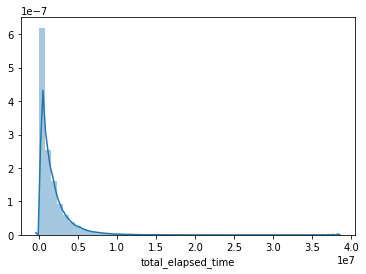

In [8]:
sns.distplot(user_device_type_time_df['total_elapsed_time'])

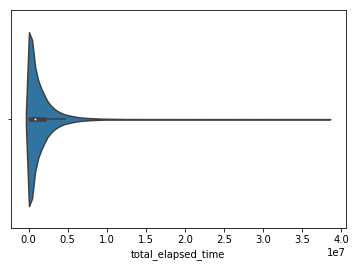

In [11]:
sns.violinplot(user_device_type_time_df['total_elapsed_time'])

### Session data 없는 유저들 일단 버리기(20만개 데이터 중 7만개 남음)

In [11]:
train_users_combined = train_users_combined.dropna(subset=['total_elapsed_time'], how='all')

In [12]:
sec = train_users_combined

### total_sec_elapsed 짧은 유저들 지정하기. (평균, 중간값 고려)

In [13]:
def calculate_sec(x):
    if x<200000:
        return 1
    else:
        return 0

In [14]:
sec['short_users'] = sec.apply(lambda x: calculate_sec(x['total_elapsed_time']),axis=1)

In [15]:
sec[sec['short_users']==1].describe()

,timestamp_first_active,age,signup_flow,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,...,Linux Desktop_pct,Mac Desktop_pct,Opera Phone_pct,Tablet_pct,Windows Desktop_pct,Windows Phone_pct,iPad Tablet_pct,iPhone_pct,sess_count,short_users
count,1.607100e+04,8301.00000,16071.000000,16071.000000,16071.000000,16071.000000,16071.000000,16071.000000,16071.000000,16071.000000,...,14836.000000,14836.000000,14836.0,14836.000000,14836.000000,14836.000000,14836.000000,14836.000000,16071.000000,16071.0
mean,2.014038e+13,37.97687,6.048535,2423.297741,2655.154315,2186.956132,26.849045,157.231660,183.435007,20356.129177,...,0.003425,0.326955,0.0,0.008005,0.299926,0.000175,0.060768,0.138141,9.180947,1.0
std,1.728593e+08,71.87913,9.800544,15617.939058,18252.495188,16178.377548,1766.762525,4273.931857,4454.917159,45449.911496,...,0.057718,0.466482,0.0,0.088724,0.455870,0.012400,0.237835,0.339184,8.998174,0.0
min,2.014010e+13,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,2.014022e+13,27.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0
50%,2.014041e+13,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.0
75%,2.014052e+13,40.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3711.500000,...,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,1.0
max,2.014063e+13,2014.00000,25.000000,196206.000000,199995.000000,199430.000000,153041.000000,193034.000000,187191.000000,199976.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,124.000000,1.0


## 2. 모바일 기기들의 사용률을 합쳐서 총 모바일 사용 퍼센테이지 계산

In [16]:
def calculate_total_mobile(x):
    return x['Android App Unknown Phone/Tablet_pct']+x['Android Phone_pct']+x['Blackberry_pct']+x['Opera Phone_pct']+x['Tablet_pct']+x['Windows Phone_pct']+x['iPad Tablet_pct']+x['iPhone_pct']

In [17]:
sec['mobile_total'] = sec.apply(calculate_total_mobile,axis=1)

In [49]:
secs = sec.dropna(subset=['mobile_total'], how='all')

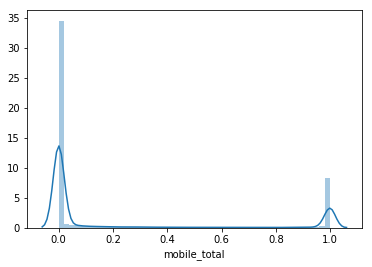

In [51]:
sns.distplot(secs['mobile_total'])

In [22]:
sec['mobile_total'].describe()

count    72580.000000
mean         0.288362
std          0.433181
min          0.000000
25%          0.000000
50%          0.000000
75%          0.914156
max          1.000000
Name: mobile_total, dtype: float64

In [23]:
secs['mobile_total'].describe()

count    72580.000000
mean         0.288362
std          0.433181
min          0.000000
25%          0.000000
50%          0.000000
75%          0.914156
max          1.000000
Name: mobile_total, dtype: float64

### 모바일 사용률 통해 그룹 나누기

In [18]:
def calculate_fr(x):
    if x<0.1:
        return "not_frequent"
    elif x>0.9:
        return "frequent"
    else:
        return "middle"

In [19]:
sec['mobile_frequent_users'] = sec.apply(lambda x: calculate_fr(x['mobile_total']),axis=1)

## 3.  Session 횟수 분포 확인 및 그룹 나누기

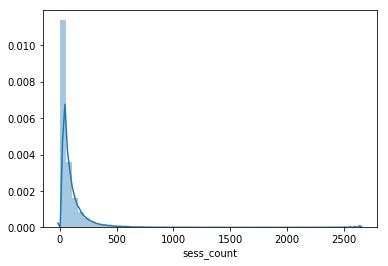

In [188]:
sns.distplot(sec['sess_count'])

In [189]:
sec['sess_count'].describe()

count    73815.000000
mean        75.024819
std        112.543174
min          1.000000
25%         13.000000
50%         38.000000
75%         91.000000
max       2644.000000
Name: sess_count, dtype: float64

In [20]:
def calculate_fr(x):
    if x<30:
        return "not_frequent_sess"
    elif x>100:
        return "frequent_sess"
    else:
        return "middle"

In [21]:
sec['frequent_session_users'] = sec.apply(lambda x: calculate_fr(x['sess_count']),axis=1)

### Short User / Not Short User 별로 여행지 비율 그래프

In [38]:
sec = sec[sec['country_destination']!="NDF"]

In [39]:
labels = sec[sec['short_users']==1]['country_destination'].value_counts().index
values = sec[sec['short_users']==1]['country_destination'].value_counts().values


In [40]:
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1','#30A9B1','#40A9B1','#30B4B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Short Users',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'Short users')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~yycheong/0 or inside your plot.ly account where it is named 'Short users'


C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [25]:
labels = sec[sec['short_users']==0]['country_destination'].value_counts().index
values = sec[sec['short_users']==0]['country_destination'].value_counts().values


In [26]:
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1','#30A9B1','#40A9B1','#30B4B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Not short Users',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'Not Short users')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Frequent Mobile Users/Not Frequent Mobile Users 여행 국가 분포 그래프

In [41]:
labels = sec[sec['mobile_frequent_users']=='frequent']['country_destination'].value_counts().index
values = sec[sec['mobile_frequent_users']=='frequent']['country_destination'].value_counts().values


In [42]:
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1','#30A9B1','#40A9B1','#30B4B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Frequent Mobile Users',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'Frequent users')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [43]:
labels = sec[sec['mobile_frequent_users']=='not_frequent']['country_destination'].value_counts().index
values = sec[sec['mobile_frequent_users']=='not_frequent']['country_destination'].value_counts().values


In [44]:
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1','#30A9B1','#40A9B1','#30B4B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Not Frequent Mobile Users',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'Not Frequent users')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Frequent Session Access/Not Frequent Session Access 여행 국가 분포 그래프

In [45]:
labels = sec[sec['frequent_session_users']=='frequent_sess']['country_destination'].value_counts().index
values = sec[sec['frequent_session_users']=='frequent_sess']['country_destination'].value_counts().values


In [46]:
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1','#30A9B1','#40A9B1','#30B4B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Frequent Session Access',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'Frequent Session Access')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [47]:
labels = sec[sec['frequent_session_users']=='not_frequent_sess']['country_destination'].value_counts().index
values = sec[sec['frequent_session_users']=='not_frequent_sess']['country_destination'].value_counts().values


In [48]:
colors =  ['#CECF93','#FACFB3','#FDBFD5' ,'#A1346C',  '#E1396D','#36B38B','#76D38B', '#80F9B1','#30A9B1','#40A9B1','#30B4B1']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors))

layout = dict(title =  'Not Frequent Session Access',
                        autosize = False,
                        height  = 500,
                        width   = 800)
fig = dict(data = [trace], layout=layout)


py.iplot(fig, filename = 'Not Frequent Session Access')

C:\Users\yeramc\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### 전체사용량은 모바일사용비율과 상관관계없음
### 접속한 횟수랑 시간은 상관관계 있음

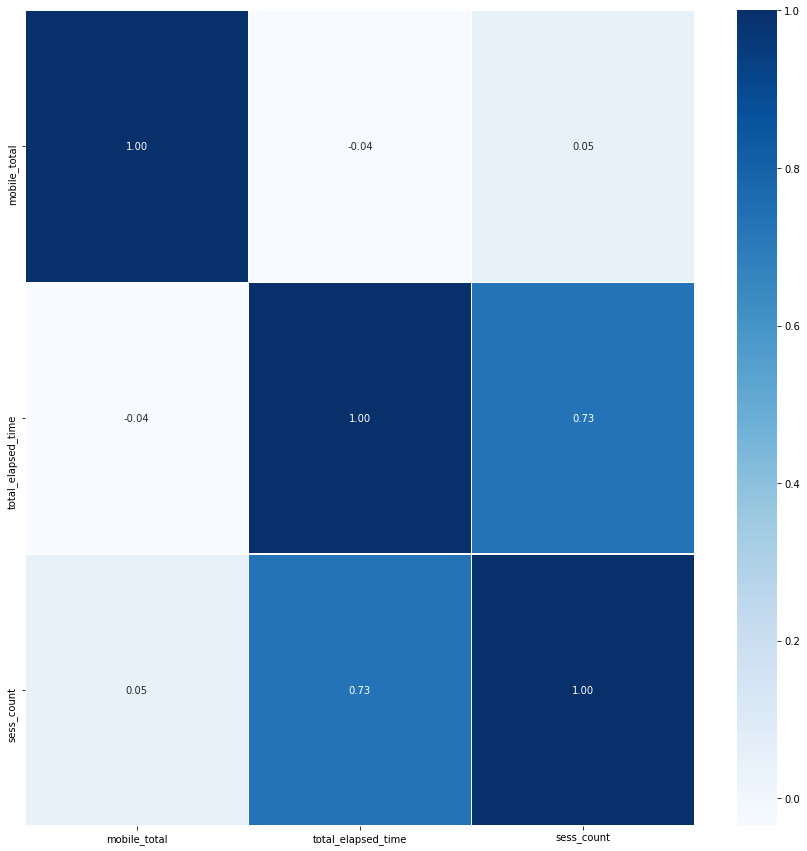

In [196]:
plt.figure(figsize=(15,15))
sns.heatmap(data = sec[['mobile_total','total_elapsed_time','sess_count']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [35]:
sec[['user_id','total_elapsed_time','short_users','mobile_total']].head()

,user_id,total_elapsed_time,short_users,mobile_total
137021,d1mm9tcy42,3427529.0,0,0.000000
137022,yo8nz8bqcq,207842.0,0,0.000000
137023,4grx6yxeby,1135444.0,0,0.000000
137024,ncf87guaf0,3755100.0,0,0.072968
137025,4rvqpxoh3h,2555.0,1,1.000000


### 모바일 Percentage가 극단적으로 낮거나 높은 사람들이 총 세션 시간이 많음

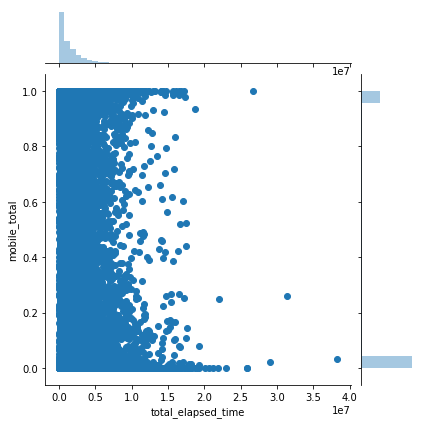

In [36]:
sns.jointplot(x="total_elapsed_time", y="mobile_total", data=sec)

###  총 세션 시간과 세션 횟수는 비례

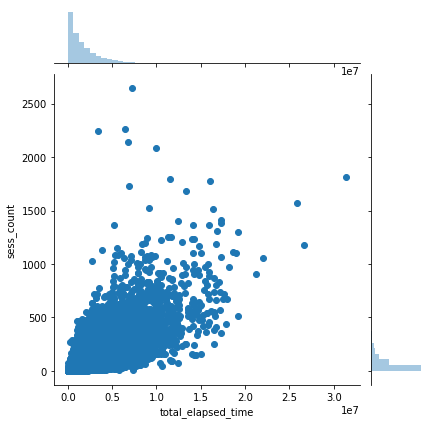

In [208]:
sns.jointplot(x="total_elapsed_time", y="sess_count", data=sec)

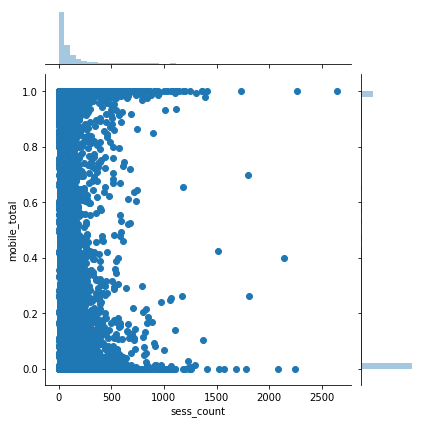

In [210]:
sns.jointplot(x="sess_count", y="mobile_total", data=sec)

### 가설4

In [113]:
tourist_df = df_train[(df_train['country_destination']=="GB") | (df_train['country_destination']=="FR") | (df_train['country_destination']=="IT") | (df_train['country_destination']=="ES")]

In [133]:
not_tourist_df = df_train[(df_train['country_destination']!="GB") & (df_train['country_destination']!="FR") & (df_train['country_destination']!="IT") & (df_train['country_destination']!="ES")]

In [115]:
tourist_df['country_destination'].value_counts()

FR    5023
IT    2835
GB    2324
ES    2249
Name: country_destination, dtype: int64

In [129]:
signup = pd.crosstab(tourist_df.country_destination, tourist_df.signup_method).apply(lambda r: r/r.sum(), axis=1)
signup

signup_method,basic,facebook,google
country_destination,,,
ES,0.711872,0.287239,0.000889
FR,0.749950,0.249453,0.000597
GB,0.743115,0.256885,0.000000
IT,0.757319,0.241975,0.000705


### 1. 나라별 Signup method 확인 그래프

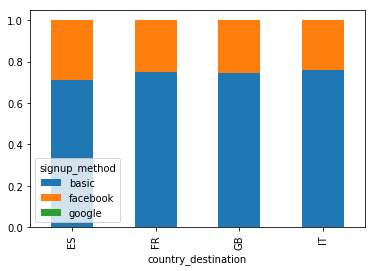

In [130]:
signup.plot.bar(stacked=True)

In [137]:
signup_all = pd.crosstab(df_train.country_destination, df_train.signup_method).apply(lambda r: r/r.sum(), axis=1)
signup_all

signup_method,basic,facebook,google
country_destination,,,
AU,0.729128,0.270872,0.000000
CA,0.773810,0.225490,0.000700
DE,0.694628,0.304430,0.000943
ES,0.711872,0.287239,0.000889
FR,0.749950,0.249453,0.000597
GB,0.743115,0.256885,0.000000
IT,0.757319,0.241975,0.000705
NDF,0.705347,0.291080,0.003573
NL,0.734908,0.265092,0.000000


### SIGNUP method facebook ES FR GB IT 딱히 다른나라에 비해 높지 않음

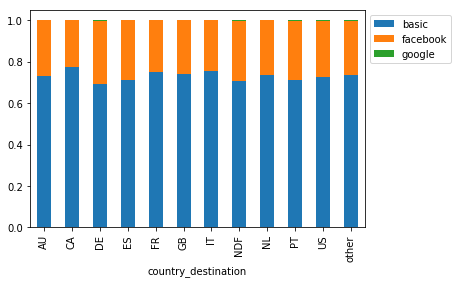

In [148]:

signup_all.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

### 2. 나라별 affiliate_provider 그래프

In [139]:
affiliate_pv = pd.crosstab(tourist_df.country_destination, tourist_df.affiliate_provider).apply(lambda r: r/r.sum(), axis=1)

affiliate_pv

affiliate_provider,baidu,bing,craigslist,direct,email-marketing,facebook,facebook-open-graph,google,gsp,meetup,naver,other,padmapper,vast,yahoo
country_destination,,,,,,,,,,,,,,,
ES,0.000000,0.008448,0.004891,0.679413,0.000000,0.014229,0.000889,0.247666,0.000000,0.000000,0.000000,0.039573,0.000445,0.002668,0.001779
FR,0.000199,0.010551,0.011945,0.653195,0.000000,0.010153,0.001991,0.276329,0.000199,0.000199,0.000199,0.028867,0.000796,0.002190,0.003185
GB,0.000000,0.009466,0.007745,0.678141,0.000861,0.010327,0.001291,0.252151,0.000000,0.000430,0.000000,0.035714,0.001721,0.000861,0.001291
IT,0.000000,0.014815,0.009524,0.654321,0.000353,0.010935,0.001411,0.273016,0.000705,0.001058,0.000353,0.029982,0.000353,0.001764,0.001411


In [140]:
affiliate_pv_all = pd.crosstab(df_train.country_destination, df_train.affiliate_provider).apply(lambda r: r/r.sum(), axis=1)
affiliate_pv_all

affiliate_provider,baidu,bing,craigslist,daum,direct,email-marketing,facebook,facebook-open-graph,google,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex
country_destination,,,,,,,,,,,,,,,,,,
AU,0.000000,0.014842,0.007421,0.000000,0.671614,0.000000,0.003711,0.001855,0.250464,0.001855,0.000000,0.000000,0.042672,0.000000,0.005566,0.000000,0.000000,0.000000
CA,0.000000,0.009804,0.027311,0.000000,0.660364,0.000000,0.009104,0.002801,0.240896,0.000000,0.000000,0.000000,0.041317,0.004902,0.002801,0.000000,0.000700,0.000000
DE,0.000000,0.015080,0.016965,0.000000,0.658812,0.000000,0.015080,0.001885,0.247879,0.000000,0.000000,0.000000,0.034873,0.000943,0.005655,0.000000,0.002828,0.000000
ES,0.000000,0.008448,0.004891,0.000000,0.679413,0.000000,0.014229,0.000889,0.247666,0.000000,0.000000,0.000000,0.039573,0.000445,0.002668,0.000000,0.001779,0.000000
FR,0.000199,0.010551,0.011945,0.000000,0.653195,0.000000,0.010153,0.001991,0.276329,0.000199,0.000199,0.000199,0.028867,0.000796,0.002190,0.000000,0.003185,0.000000
GB,0.000000,0.009466,0.007745,0.000000,0.678141,0.000861,0.010327,0.001291,0.252151,0.000000,0.000430,0.000000,0.035714,0.001721,0.000861,0.000000,0.001291,0.000000
IT,0.000000,0.014815,0.009524,0.000000,0.654321,0.000353,0.010935,0.001411,0.273016,0.000705,0.001058,0.000353,0.029982,0.000353,0.001764,0.000000,0.001411,0.000000
NDF,0.000153,0.012004,0.014894,0.000000,0.627831,0.001036,0.011891,0.003244,0.248219,0.003340,0.002417,0.000273,0.063319,0.004143,0.004480,0.000064,0.002585,0.000104
NL,0.000000,0.009186,0.006562,0.000000,0.654856,0.001312,0.014436,0.002625,0.271654,0.000000,0.001312,0.000000,0.036745,0.000000,0.001312,0.000000,0.000000,0.000000


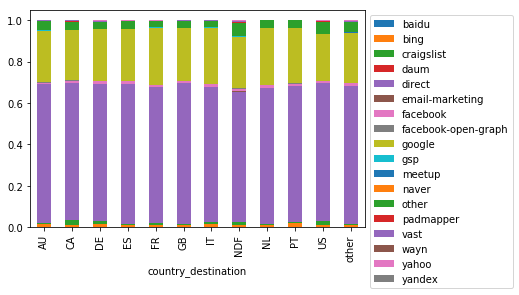

In [147]:
affiliate_pv_all.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

### 3. 나라별 first_affiliate_tracked 그래프

In [149]:
fr_aff = pd.crosstab(tourist_df.country_destination, tourist_df.first_affiliate_tracked).apply(lambda r: r/r.sum(), axis=1)

fr_aff

first_affiliate_tracked,linked,marketing,omg,product,tracked-other,untracked
country_destination,,,,,,
ES,0.248080,0.000000,0.191143,0.004971,0.015364,0.540443
FR,0.221882,0.000408,0.212288,0.005715,0.018575,0.541131
GB,0.221351,0.000436,0.216993,0.002614,0.020479,0.538126
IT,0.197420,0.000358,0.226084,0.010749,0.017915,0.547474


In [150]:
fr_aff_all = pd.crosstab(df_train.country_destination, df_train.first_affiliate_tracked).apply(lambda r: r/r.sum(), axis=1)
fr_aff_all

first_affiliate_tracked,linked,local ops,marketing,omg,product,tracked-other,untracked
country_destination,,,,,,,
AU,0.206831,0.001898,0.000000,0.225806,0.007590,0.011385,0.546490
CA,0.212797,0.000000,0.000719,0.192667,0.007189,0.028037,0.558591
DE,0.225744,0.000000,0.000000,0.193084,0.002882,0.022094,0.556196
ES,0.248080,0.000000,0.000000,0.191143,0.004971,0.015364,0.540443
FR,0.221882,0.000000,0.000408,0.212288,0.005715,0.018575,0.541131
GB,0.221351,0.000000,0.000436,0.216993,0.002614,0.020479,0.538126
IT,0.197420,0.000000,0.000358,0.226084,0.010749,0.017915,0.547474
NDF,0.217816,0.000208,0.000632,0.229229,0.008435,0.032159,0.511521
NL,0.206391,0.000000,0.000000,0.210386,0.009321,0.014647,0.559254


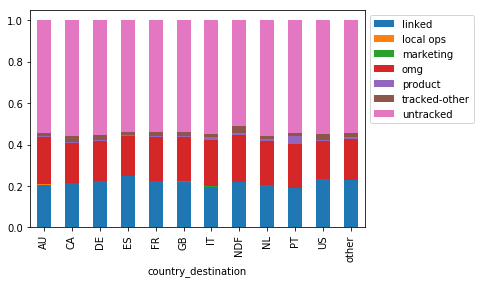

In [151]:
fr_aff_all.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

### 나라별 first_device_type 그래프

In [52]:
def device(x):
    if x == "Mac Desktop":
        return "Desktop"
    elif x== "Windows Desktop":
        return "Desktop"
    elif x== "Desktop(Other)":
        return "Desktop"
    elif x== "Other/Unknown":
        return "Other/Unknown"
    elif x== "Android Tablet":
        return "Tablet"
    elif x == "iPad":
        return "Tablet"
    else:
        return "Mobile"

In [53]:
df_train['mobileordesktop'] = df_train.apply(lambda x: device(x['first_device_type']),axis=1)

In [54]:
device_k = pd.crosstab(df_train.country_destination, df_train.first_device_type).apply(lambda r: r/r.sum(), axis=1)
device_k

first_device_type,Android Phone,Android Tablet,Desktop (Other),Mac Desktop,Other/Unknown,SmartPhone (Other),Windows Desktop,iPad,iPhone
country_destination,,,,,,,,,
AU,0.001855,0.003711,0.007421,0.491651,0.033395,0.000000,0.317254,0.077922,0.066790
CA,0.009104,0.007703,0.012605,0.475490,0.034314,0.000000,0.364146,0.054622,0.042017
DE,0.003770,0.004713,0.012253,0.521206,0.023563,0.000000,0.319510,0.058435,0.056550
ES,0.005780,0.004891,0.004891,0.488217,0.027123,0.000000,0.343708,0.067586,0.057803
FR,0.003384,0.004579,0.004778,0.516225,0.032849,0.000398,0.313757,0.070874,0.053155
GB,0.001291,0.002151,0.003442,0.515060,0.022375,0.000000,0.328744,0.068417,0.058520
IT,0.004586,0.005996,0.004586,0.486420,0.020106,0.000353,0.341799,0.079365,0.056790
NDF,0.016765,0.006680,0.005211,0.380190,0.062565,0.000409,0.341761,0.071261,0.115157
NL,0.006562,0.006562,0.006562,0.523622,0.024934,0.000000,0.291339,0.089239,0.051181


In [55]:
device = pd.crosstab(df_train.country_destination, df_train.mobileordesktop).apply(lambda r: r/r.sum(), axis=1)
device

mobileordesktop,Desktop,Mobile,Other/Unknown,Tablet
country_destination,,,,
AU,0.808905,0.076067,0.033395,0.081633
CA,0.839636,0.063725,0.034314,0.062325
DE,0.840716,0.072573,0.023563,0.063148
ES,0.831925,0.068475,0.027123,0.072477
FR,0.829982,0.061716,0.032849,0.075453
GB,0.843804,0.063253,0.022375,0.070568
IT,0.828219,0.066314,0.020106,0.085362
NDF,0.721951,0.137543,0.062565,0.077941
NL,0.814961,0.064304,0.024934,0.095801


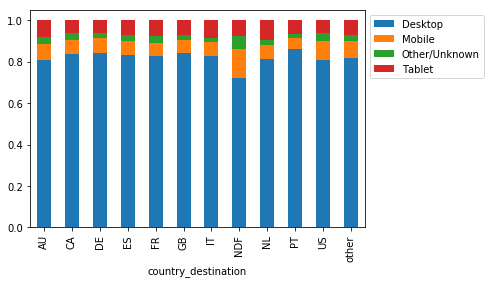

In [56]:
device.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

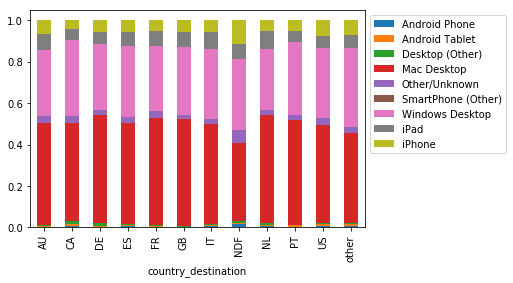

In [57]:
device_k.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

### 가설5 ~ device type에 따른 평균 나이

In [214]:
plt.rcParams["figure.figsize"] = (30,10)

### Android Tablet, ipad의 평균 나이가 높음

In [63]:
plt.rcParams["figure.figsize"] = (30,10)

In [64]:
df_train = df_train[df_train['age']<100]

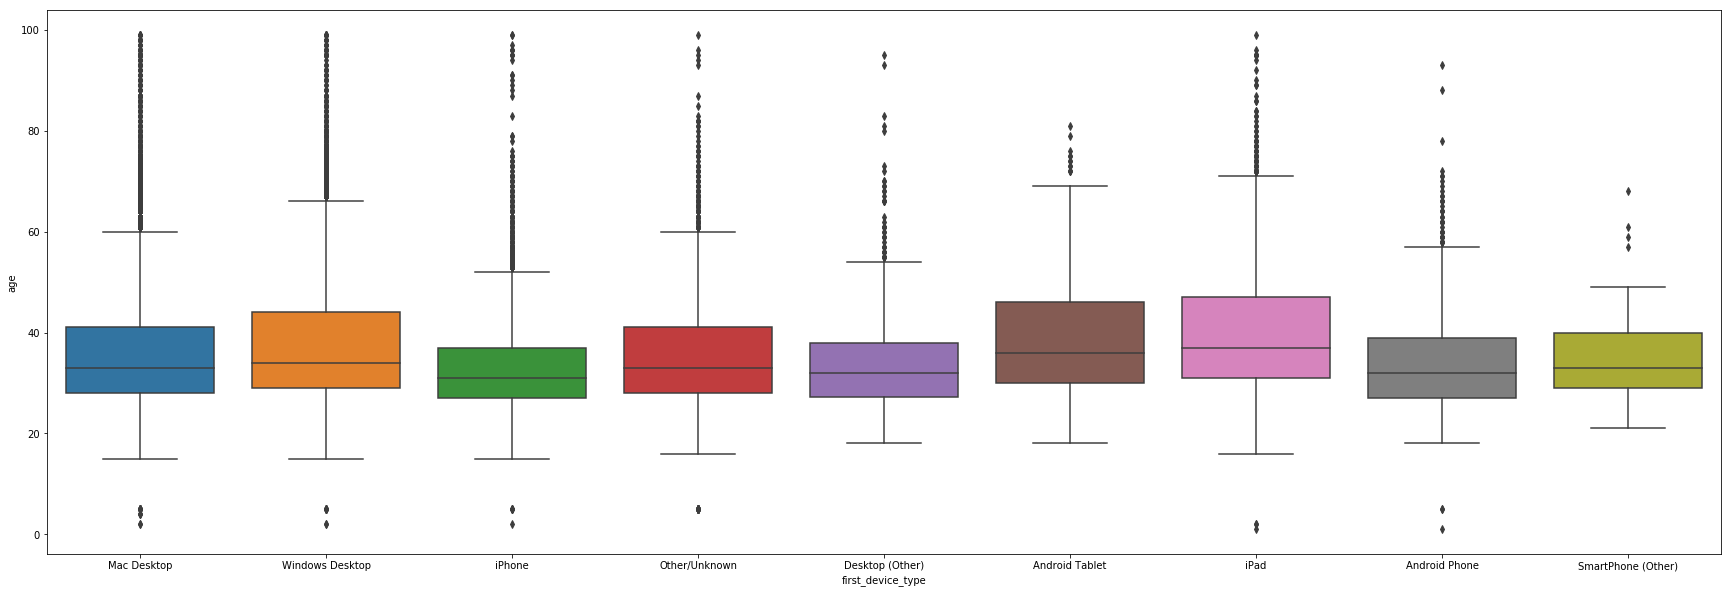

In [65]:
sns.boxplot("first_device_type","age",data =df_train)


In [234]:
index = ['age']
columns = ['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)']
df_age = pd.DataFrame(index=index,columns=columns)

In [237]:

for x in ['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)']:
    df_age[x] = df_train[df_train['first_device_type']==x]['age'].mean()

In [238]:
df_age

,Mac Desktop,Windows Desktop,iPhone,Other/Unknown,Desktop (Other),Android Tablet,iPad,Android Phone,SmartPhone (Other)
age,35.968816,37.681174,33.105379,35.91738,34.811321,39.214173,39.896579,34.193755,36.051282


In [66]:
index = ['age']
columns = ['Desktop', 'Mobile', 'Other/Unknown','Tablet']
df_sum = pd.DataFrame(index=index, columns=columns)

In [67]:
for x in ['Desktop', 'Mobile', 'Other/Unknown','Tablet']:
    df_sum[x] = df_train[df_train['mobileordesktop']==x]['age'].mean()

In [68]:
df_sum

,Desktop,Mobile,Other/Unknown,Tablet
age,36.686853,33.324972,35.91738,39.843586


# <끝>

/////Ploting Start/////